# Overview
- 파이썬 스타일의 코딩 기법
- 파이썬 특유의 문법을 활용하여 효율적으로 코드를 표현함
- 그러나 더 이상 파이썬 특유는 아님, 많은 언어들이 서로의 장점을 채용
- 고급 코드를 작성 할 수록 더 많이 필요해짐

#### why pythonic code?
- 남 코드에 대한 이해도
    - 많은 개발자들이 python 스타일로 코딩한다
- 효율
    - 단순 for loop append보다 list가 조금 더 빠르다
    - 익숙해지면 코드도 짧아진다.
- 간지
    - 쓰면 왠지 코드 잘 짜는 거처럼 보인다


#### 1. spilt & join
#### 2. list comprehension
#### 3. enumerate & zip ->  열거, 묶기
#### 4.lambda & map & reduce
#### 5. generator 
#### 6. asterisk

## split 
- string type의 값을 “기준값”으로 나눠서 List 형태로 변환

In [2]:
items = 'zero one two three'.split()
items

['zero', 'one', 'two', 'three']

In [3]:
example = 'python,java,javascript'
a, b, c = example.split(",")
print(a, b,c)

python java javascript


## join 
- String으로 구성된 list를 합쳐 하나의 string으로 반환

In [5]:
colors = ['red', 'blue', 'green', 'yellow']
result = ''.join(colors)
print(result)
result = ', '.join(colors)
print(result)

redbluegreenyellow
red, blue, green, yellow


## list comprehension
- 기존 List 사용하여 간단히 다른 List를 만드는 기법
- 포괄적인 List, 포함되는 리스트라는 의미로 사용됨
- 파이썬에서 가장 많이 사용되는 기법 중 하나
- 일반적으로 for + append 보다 속도가 빠름

In [6]:
result = [i for i in range(10) if i % 2 == 0] # 0일때만 i
result

[0, 2, 4, 6, 8]

In [11]:
case_1 = ["A","B","C"]
case_2 = ["D","E","A"]
result = [i+j for i in case_1 for j in case_2]
print(result)
result = [i+j for i in case_1 for j in case_2 if not(i==j)] 
print(result)
result = [i+j if not(i==j) else i for i in case_1 for j in case_2] # else까지 사용할거면 이렇게. 
print(result)

['AD', 'AE', 'AA', 'BD', 'BE', 'BA', 'CD', 'CE', 'CA']
['AD', 'AE', 'BD', 'BE', 'BA', 'CD', 'CE', 'CA']
['AD', 'AE', 'A', 'BD', 'BE', 'BA', 'CD', 'CE', 'CA']


    Two dimensional vs One dimensional

In [12]:
case_1 = ["A","B","C"]
case_2 = ["D","E","A"]
result = [i+j for i in case_1 for j in case_2]
'''
for i in case_1:
    for j in case_2:
        line.append(i+j)
'''
print(result)

result = [ [i+j for i in case_1] for j in case_2]
'''
for j in case_2:
    line = []
    for i in case_1:
        line.append(i+j)
'''
print(result)

['AD', 'AE', 'AA', 'BD', 'BE', 'BA', 'CD', 'CE', 'CA']
[['AD', 'BD', 'CD'], ['AE', 'BE', 'CE'], ['AA', 'BA', 'CA']]


## enumerate
- list의 element를 추출할 때 번호를 붙여서 추출
- 데이터를 dict로 만들때 자주씀

In [14]:
for idx, v in enumerate(["tic","tac","tok"]):
    print(v, idx)

tic 0
tac 1
tok 2


## zip
- 두 개의 list의 값을 병렬적으로 추출함

In [18]:
alist = ['a1', 'a2', 'a3']
blist = ['b1', 'b2', 'b3']
result = [ c for c in zip(alist, blist)] # 튜플 타입으로 묶어준다
print(result)
result = [ [a,b] for a, b in zip(alist, blist)]
print(result)

[('a1', 'b1'), ('a2', 'b2'), ('a3', 'b3')]
[['a1', 'b1'], ['a2', 'b2'], ['a3', 'b3']]


In [21]:
math = (100,90,80)
kor = (90,80,70)
eng = (90,80,70)
res = [sum(value)/3 for value in zip(math,kor,eng)] # 이렇게 하는게 보기 좋지
print(res)

res = []
for i in range(3):
    res.append((math[i]+kor[i]+eng[i])/3)
print(res)


[93.33333333333333, 83.33333333333333, 73.33333333333333]
[93.33333333333333, 83.33333333333333, 73.33333333333333]


In [24]:
alist = ['a1', 'a2', 'a3']
blist = ['b1', 'b2', 'b3']
for idx, values in enumerate(zip(alist, blist)):
    print(idx, values)

0 ('a1', 'b1')
1 ('a2', 'b2')
2 ('a3', 'b3')


In [30]:
zip(alist,blist) # <zip at 0x1fe0c93cf88>
list(zip(alist,blist)) # [('a1', 'b1'), ('a2', 'b2'), ('a3', 'b3')]
enumerate(list(zip(alist,blist))) # <enumerate at 0x1fe0c939f30>
list(enumerate(zip(alist,blist))) # [(0, ('a1', 'b1')), (1, ('a2', 'b2')), (2, ('a3', 'b3'))]

[(0, ('a1', 'b1')), (1, ('a2', 'b2')), (2, ('a3', 'b3'))]

## lambda
- 함수 이름 없이, 함수처럼 쓸 수 있는 익명함수
- 수학의 람다 대수에서 유래함

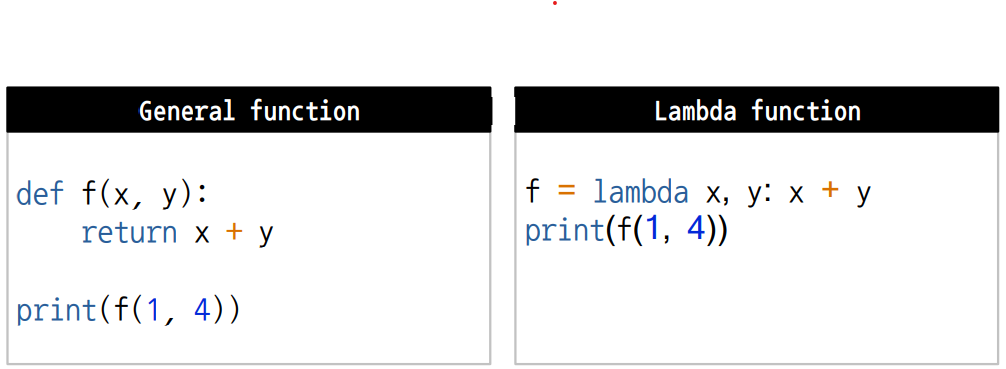

In [41]:
def f(x,y):
    return x + y
print(f(10,50))
print("람다:",(lambda x,y: x+y)(10,50))

60
람다: 60


#### lambda 는 많이쓰지만 PEP8에서는 지양함. (PEP8은 python을 개선하는 제안서 중에서 코딩 규칙에 대한 제안서)
- 어려운 문법
- 테스트의 어려움
- 문서화 docstring 지원 미비
- 코드 해석의 어려움
- 이름이 존재하지 않는 함수의 출현
- 그래도 많이 쓴다...

In [40]:
up_low = lambda x : x.upper() + x.lower() # 
up_low('Happy Halloween')

'HAPPY HALLOWEENhappy halloween'

## map
- 두 개 이상의 list에도 적용 가능함, if filter도 사용가능
- 최근에는 map을 사용하는데 직관적이지 않아서 지양함

In [51]:
def f1(x):
    return x + 5
def f2(x,y):
    return x + y
ex = [1,2,3,4,5]
print(list(map(f1,ex)))
print(list(map(f2,ex,ex)))

print([f1(value) for value in ex]) # 이 방법으로 쓰면되는데 궂이 map?

[6, 7, 8, 9, 10]
[2, 4, 6, 8, 10]
[6, 7, 8, 9, 10]
